<h1>Trabalho 3 - Regressão Logística com Múltiplas Features</h1>

Nesta tarefa, implementaremos um algoritmo de regressão logística capaz de lidar com datasets de múltiplas features. Utilizaremos o método do gradiente descendente para encontrar os pesos w e b do nosso modelo.

Para completar esta tarefa, você deve implementar o seguinte:
- Uma função sigmóide.
- Uma função de gradiente, para calcular o valor da derivada da função de custo para os parâmetros $\vec{w}$ e $b$.
- Uma função para o método de gradiente descendente de múltiplas features.
- Uma função de custo $J(\vec{w},b)$, a entropia-cruzada binária, que utilizaremos para analisar a convergência do modelo.
- Uma função para predizer a classe do exemplo.

O dataset que utilizaremos está disponível no moodle. É um dataset contendo notas de dois exames realizados por alunos e o rótulo indicando se o aluno foi aceito em uma universidade com estas notas ou não. Trata-se de um problema de **classificação binária**.

Trabalharemos basicamente com arrays numpy, porém utilizaremos a biblioteca pandas pela conveniência de informações e facilidade de carregar o dataset disponibilizado em um arquivo CSV.
Também utilizaremos o módulo pyplot da biblioteca matplotlib, para plotar os gráficos que utilizaremos para avaliar o modelo.

<h2>Importando biliotecas, carregando e preparando dataset</h2>

Trabalharemos basicamente com arrays numpy, porém utilizaremos a biblioteca pandas pela conveniência de informações e facilidade de carregar o dataset disponibilizado em um arquivo CSV. Também utilizaremos o módulo pyplot da biblioteca matplotlib, para plotar os gráficos que utilizaremos para avaliar o modelo.

Importando as bibliotecas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

O primeiro passo é importar nosso dataset em um dataframe pandas. 

Note que se o dataset não estivar na mesma pasta em que este Notebook você precisará alterar o caminho para o arquivo.

In [2]:
dataset = pd.read_csv("notas_vs_admissao.csv")

O dataset que vamos utilizar contém exemplos de alunos que realizaram dois exames diferentes e aplicaram para entrada em uma universidade. 
Caso o aluno tenha sido admitido para a universidade, sua classe é 1, caso contrário, sua classe é 0.

Neste trabalho, o objetivo é treinar um modelo capaz de predizer corretamente a classe do aluno (admitido ou não) com base nas notas dos exames.

Inicialmente, vamos analisar os 10 primeiros exemplos do nosso dataset.

In [3]:
dataset.head(10)

,Nota1,Nota2,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


A biblioteca pandas possui a função <b>describe()</b>, que compila diversas medidas estatísticas de cada feature do nosso dataset de forma automática.
- count: quantidade de exemplos no dataset
- mean: média aritmética
- std: desvio padrão
- min: menor valor da feature no dataset
- 25% / 50% / 75%: percentis para cada feature (valor que divide o dataset nessa proporção, para 50% é o mesmo que a mediana)
- max: maior valor da feature no dataset

In [4]:
dataset.describe()

,Nota1,Nota2,Admitido
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Para implementação, iremos trabalhar apenas com arrays da bilioteca numpy, por isso converteremos o dataframe pandas em dois arrays numpy. O primeiro contendo nossos exemplos e o segundo contendo os nossos valores objetivos.


In [5]:
nparray = dataset.to_numpy()
numero_feature = nparray.shape[1]
X = nparray[:,:numero_feature-1]
Y = nparray[:,numero_feature-1]

Abaixo podemos verificar as dimensões e tipo dos nossos dados.

In [6]:
X.shape

(100, 2)

In [7]:
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [8]:
Y.shape

(100,)

In [9]:
Y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

Vamos visualizar a distribuição das classes em relação as notas dos exames.

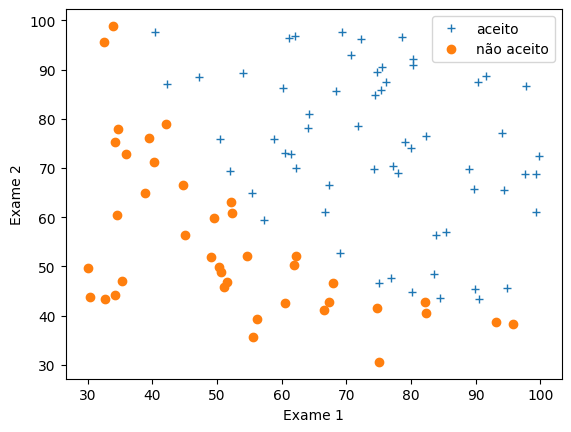

In [10]:
aprovados = Y == 1

reprovados = Y == 0

plt.plot(X[aprovados,0],X[aprovados,1],'+',label="aceito")
plt.plot(X[reprovados,0],X[reprovados,1],'o',label="não aceito")
plt.xlabel("Exame 1")
plt.ylabel("Exame 2")
plt.legend(loc="upper right")
plt.show()

<h2>Desenvolvendo gradiente descendente para Regressão Logística</h2>

A regressão logística realiza uma regressão linear *z* para encontrar um <i>decision boundary</i> e depois aplica a função sigmóide como função de *threshold* para definir uma probabilidade da instância pertencer a uma classe ou outra.

Precisaremos desenvolver as seguintes funções:
- Função sigmóide
- Função para calcular gradientes
- Função para executar o método gradiente descendente
- Função para calcular o custo do erro de predições


<h3>Função Sigmóide</h3>

* A função sigmóide é definida como: 

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

Ela mapeia a entrada 'z' para um valor em um intervalo entre 0 e 1, e com isso podemos tratar este valor como uma probabilidade.

* A função 'z' para multiplas features é definida como:
$$
z = f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w}\cdot \vec{x}^{(i)}+b
$$

* $\vec{w}$ é um vetor com os parâmetros $w_0$...$w_n$ para as features do nosso dataset

* $\vec{x}^{(i)}$ é um vetor com os valores das features ${x_0}^{(i)}...{x_n}^{(i)}$ para o exemplo 'i' (i-ésimo exemplo do dataset).

<b><i>ATENÇÃO!!!!!!!</i></b> $x^{(i)}$ não significa $x$ <b>elevado</b> ao número $i$, mas sim o i-ésimo exemplo do nosso dataset!

Lembrando que o que estamos calculando entre $\vec{w}$ e $\vec{x_{i}}$ é o produto escalar (dot product) entre os dois vetores, representado por $\vec{w}\cdot \vec{x_{i}}$

O produto escalar entre um vetor $w$ e um vetor $x$ é calculado com a seguinte fórmula:
$$
\sum_{j=0}^{n-1}w_j \times {x}_{j}
$$
Que é equivalente a:
$$
w_0 \times {x}_0 + w_1 \times {x}_1 + w_2 \times x_2 + ... + w_j \times {x}_j + ... + w_n \times {x}_n
$$

Onde

- $n$ é o número de features

<b>Dica:</b> Podemos utilizar a função <b>numpy.dot(w,x)</b> para calcular isto de forma vetorizada (em paralelo) e acelerar - e muito - nossos cálculos.

In [11]:
def sigmoide(z): 
    '''
    Parâmetros:
    z (escalar) : Pode ser um valor escalar ou um array
    Saída:
        h: o valor da sigmóide de z
    '''
    h = None
    #### código inicia aqui ####
    # calcular sigmóide de z
    #dica: utilize a função da biblioteca numpy np.exp() para calcular o exponencial

    h = 1/(1+np.exp(-z))

    #### código termina aqui ###
    
    return h

Você pode testar a função para valores já conhecidos. Por exemplo, sabemos que quando $z = 0$ o valor da sigmóide deve ser $0.5$ (o ponto de inflexão da curva sigmóide).


In [12]:
print(sigmoide(0))

0.5


<h3>Função de custo</h3>

A função de custo utilizada para regressão logística **não** é a mesma que utilizamos na regressão linear. Na regressão logística, para calcular $J(\vec{w},b)$ utilizamos a entropia-cruzada binária:

$$J(\vec{w},b) = -\frac{1}{m} \sum_{i=0}^{m-1} y^{(i)}\cdot\log (\hat{y}^{(i)})) + (1-y^{(i)})\cdot\log (1-\hat{y}^{(i)}))\tag{5} $$

* $m$ é o número de exemplos de treinamento
  
* $y^{(i)}$ é o valor real do rótulo do exemplo 'i' (o i-éximo exemplo)
  
* $\hat{y}^{(i)}$ é a predição do modelo para o exemplo de treinamento 'i' (o i-éximo exemplo)

A função de perda (Loss) para um único exemplo de treinamento é:
$$ Loss = -1 \times \left( y^{(i)}\cdot\log (\hat{y}^{(i)})) + (1-y^{(i)})\cdot\log (1-\hat{y}^{(i)})) \right)$$

* $\hat{y}$ = sigmoide(z)
* Todos valores de $\hat{y}$ estarão entre 0 e 1. Como o logarítmo de um número menor do que 1 é negativo, aplicamos o fator multiplicativo de -1 para tornar nossa perda positiva.
* Quando o modelo prediz 1 ($\hat{y} = 1$) e o rótulo 'y' também é 1, a função de Loss para esse exemplo de treinamento é 0.
* De maneira similar, quando o modelo prediz 0 ($\hat{y} = 0$) e o rótulo 'y' também é 0, a função de Loss para esse exemplo de treinamento é 0.
* Caso a predição do modelo seja perto de 1 (digamos, $\hat{y} = 0.999$) e o rótulo 'y' seja 0, então o segundo termo da nossa função de loss será $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$, ou seja, teremos um valor de Loss alto (9.2).
* O mesmo vale para o caso em que o modelo prediz um valor perto de zero (por exemplo, $\hat{y} = 0.0001$) e nosso rótulo 'y' é 1. Neste caso, o nosso primeiro termo na função de loss será $-1 \times log(0.0001) \approx 9.2$, ou seja, teremos um valor de Loss alto (9.2).

Implemente o código necessário para completar a função de custo $J(\vec{w},b)$ abaixo.

In [13]:
def funcao_custo(X,Y,W,b):
    """
    Parâmetros:
    X (ndarray (m,n)) : Dataset, m exemplos com n features
    Y (ndarray (m,))  : valores objetivo para cada exemplo do dataset
    W (ndarray (n,))  : parâmetros w do modelo
    b (escalar)       : parâmetro b do modelo
    
    Retorno:
    custo_total (escalar): custo total dos parâmetros w e b no dataset X
    """
    custo_total = 0
    m,n = X.shape #m = total de exemplos, n = total de features

    #código inicia aqui

    z = np.dot(X,W) + b
    h = sigmoide(z)

    custo_total = (-1/m)*np.sum(Y*np.log(h) + (1-Y)*np.log(1-h))

                        #não esqueça de utilizar a função np.dot() para cálculo do produto escalar!
    
    #código termina aqui
    return custo_total

<h3>Calculando gradiente</h3>

A função gradiente calcula o valor das derivadas da função de custo $J(\vec{w},b)$ em relação aos parâmetros $\vec{w}$ e $b$.

Quando temos múltiplos parâmetros precisamos calcular individualmente a derivada de cada parâmetro e armazenar todos esses valores em um vetor (o vetor gradiente!)

A derivada da função de custo em relação a um parâmetro $w_j$ é: 

$$
1/m\sum_{i=0}^{m-1} (\hat{y_{i}} - y_{i})\times {x_j}^{(i)}
$$

A derivada da função de custo em relação a **b** é:

$$
1/m\sum_{i=0}^{m-1} (\hat{y_{i}} - y_{i})
$$


* $m$ é o número de exemplos de treinamento
  
* ${x_j}^{(i)}$ é o valor da feature $j$ para o exemplo 'i' (o i-éximo exemplo)
  
* $y^{(i)}$ é o valor real do rótulo do exemplo 'i' (o i-éximo exemplo)
  
* $\hat{y}^{(i)}$ é a predição do modelo para o exemplo de treinamento 'i' (o i-éximo exemplo)

In [14]:
def gradiente(X,Y,W,b):
    """
    Função para computar o gradiente com parâmetros específicos w e b
    Parâmetros:
    X (ndarray (m,n)): Dataset, m exemplos com n features
    Y (ndarray (m,)) : valores objetivo
    W (ndarray (n,)) : vetor de parâmetros w do modelo
    b (escalar)      : parâmetro b do modelo

    Retorno:
    derivada_w (ndarray (n,)): valor da derivada da função de custo em relação a cada parâmetro wj
    derivada_b (escalar):      valor da derivada da função de custo em relação a b
    """

    m,n = X.shape #m = total de exemplos, n = total de features
    derivadas_w = np.zeros(n) #array de tamanho (n,) inicializado com zeros
    derivada_b = 0

    #código inicia aqui


            #não esqueça de utilizar a função np.dot() para cálculo do produto escalar!
    
    #código termina aqui

    return derivadas_w, derivada_b

<h3>Método do gradiente descendente</h3>

O método **gradiente_descendente** minimiza o custo para os parâmetros $\vec{w}$ e $b$.

O gradiente descendente funciona como abaixo.

Repetir até convergir:

{
$$w_0 = w_0 - \alpha * \frac{\partial J}{\partial w_0}$$
$$w_0 = w_1 - \alpha * \frac{\partial J}{\partial w_1}$$
$$.$$
$$.$$
$$.$$
$$w_0 = w_j - \alpha * \frac{\partial J}{\partial w_j}$$
$$b = b - \alpha * \frac{\partial J}{\partial b}$$
}

Lembrando que $\vec{w}$ e $b$ precisam ser atualizados simultaneamente. Ou seja, suas derivadas precisam ser **todas** calculadas antes de atulizar qualquer um deles.

**Convergir** significa que nenhum dos parâmetro é atualizado após uma iteração do método, o que significa que já encontramos um mínimo global. Na prática, isto pode demorar muito, por isso temos um novo parâmetro, chamado de ***épocas***, que define um número máximo de iterações para o método, para evitar que fique tentando convergir infinitamente.



In [15]:
def gradiente_descendente(X,Y,W_inicial,b_inicial,learning_rate,epocas):
    """
    Função para encontrar os parâmetros w e b que minimizam o custo de erro do nosso modelo
    
    Parâmetros:
    X (ndarray (m,n))        : Dataset, m exemplos com n features
    Y (ndarray (m,))         : valores objetivo
    W_inicial (ndarray (n,)) : vetor de parâmetros w para começar o método
    b_inicial (escalar)      : parâmetro b inicial para começar o método
    learning_rate (escalar)  : taxa de aprendizado do nosso algoritmo (geralmente menor que 0.01)
    epocas(escalar)          : numero máximo de iterações para o método do gradiente descente
    
    Retorno:
    W (ndarray (n,))         : vetor com melhores valores encontrados para os parâmetros w
    b (escalar)              : melhor valor encontrado para b
    histórico_J (list)       : uma lista contendo os valores da função de custo ao longo das épocas
    """
    
    m,n = X.shape #m = total de exemplos, n total de features

    W = W_inicial
    b = b_inicial

    historico_J = []    #pode ser interessante calcular o custo a cada X épocas, ao invés de calcular em toda época, por questões de performance
    
    #código inicia aqui

    
    #código encerra aqui

    return W,b,historico_J

<h2>Treinando e avaliando nosso modelo</h2>

Quando treinamos um modelo, idealmente desejamos que ele tenha boa performance em dados que ele não utilizou durante o treinamento.
Como dados não caem do céu, em geral o que fazemos é dividir nosso conjunto de treinamento em duas partes, uma para ser utilizada no treinamento (o conjunto de treinamento de fato) e outra para ser utilizada para avaliar o modelo (o conjunto de testes).

Durante o treinamento o algoritmo não deve utilizar **nenhum** dado de teste. Só assim poderemos ter certeza de que nosso modelo performa bem em dados que ele não conhece.

<h3>Treinando o modelo</h3>

Inicialmente, vamos dividir nosso dataset em dois conjunto, um para treinamento, outro para teste.

Faremos isto de maneira ingênua, assumindo que nosso dataset já está distribuído de forma aleatória.

Utilizaremos 80% do dataset para treinamento, 20% para testes.

In [16]:
m = X.shape[0] #tamanho do dataset

tamanho_treino = int(m*0.8)

X_treino = X[0:tamanho_treino]
Y_treino = Y[0:tamanho_treino]

X_teste = X[tamanho_treino:m]
Y_teste = Y[tamanho_treino:m]

print(X_treino.shape)
print(X_teste.shape)

(80, 2)
(20, 2)


Abaixo, alguns valores para iniciarmos o treinamento.

In [17]:
learning_rate = 0.0001
epocas = 500
W_inicial = np.zeros(X.shape[1])
b_inicial = 0

W, b, historico_J = gradiente_descendente(X_treino, Y_treino, W_inicial, b_inicial, learning_rate, epocas)

print(f"Os parâmetros W resultantes do treinamento são: {W}")
print(f"O parâmetro b resultante do treinamento é: {b}")
print(f"O custo para o conjunto de treinamento é {funcao_custo(X_treino, Y_treino, W, b):.8f}.")


Os parâmetros W resultantes do treinamento são: [0. 0.]
O parâmetro b resultante do treinamento é: 0
O custo para o conjunto de treinamento é 0.69314718.


Vamos analisar se o modelo convergiu, observando a curva do custo de treinamento vs tempo de treinamento (iterações).

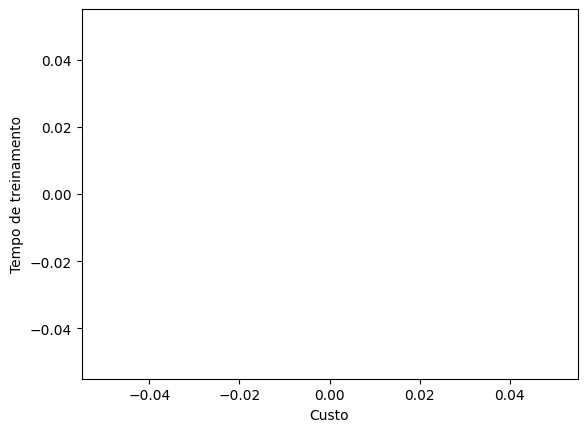

In [18]:
plt.xlabel("Custo")
plt.ylabel("Tempo de treinamento")
plt.plot(historico_J)

<h3>Testando o modelo</h3>

Vamos testar a capacidade do nosso modelo predizer corretamente se um aluno é aceito na universidade ou não.

Primeiro, desenvolva uma função para predição que irá calcular a probabilidade do aluno ser aceito (utilizando a sigmóide).

In [19]:
def predizer_aluno(aluno, W, b):
    '''
    entrada: 
        aluno (1darray (2,)) : contendo notas para os dois exames realizados pelo aluno
        W(ndarray (n,))      : vetor de parâmetros w para começar o método
        b(escalar)           : parâmetro b inicial para começar o método
    saída: 
        y_pred: a probabilidade de um aluno ser admitido na universade
    '''

    ### código inicia aqui ###

    # utilize a função sigmóide para realizar a predição
    # não esqueça de calcular z para passar como parametro para a função sigmoide
    y_pred = None
    
    ### código termina aqui ###
    
    return y_pred

Vamos ver algumas probabilidades calculadas pelo modelo.

In [20]:
alunos = np.array([[100.,100.],[85.,70.],[2.,10.],[70.,85.],[90.,30.],[0,0]])

for aluno in alunos:
    print(f"Aluno com notas {aluno[0]} e {aluno[1]} tem uma chance de {predizer_aluno(aluno, W, b)} ser aceito na universidade.")

Aluno com notas 100.0 e 100.0 tem uma chance de None ser aceito na universidade.
Aluno com notas 85.0 e 70.0 tem uma chance de None ser aceito na universidade.
Aluno com notas 2.0 e 10.0 tem uma chance de None ser aceito na universidade.
Aluno com notas 70.0 e 85.0 tem uma chance de None ser aceito na universidade.
Aluno com notas 90.0 e 30.0 tem uma chance de None ser aceito na universidade.
Aluno com notas 0.0 e 0.0 tem uma chance de None ser aceito na universidade.


Agora, vamos avaliar a performance de predição nosso modelo utilizando uma métrica apropriada.

Para o caso da predição do valor de uma casa, utilizamos uma métrica de diferença do erro quadrado, pois dificilmente nosso valor predito seria exatamente igual ao valor objetivo.

Já para o caso de uma classificação binária, apesar da sigmóide nos entregar uma *probabilidade* de um exemplo pertecer a uma classe, na prática definimos um valor de corte para atribuir um exeplo a uma classe ou outra. Ou seja, a predição só pode ou acertar exatamente a classe ou errar completamente a classe do exemplo.

Neste caso, faz mais sentido utilizarmos uma métrica de acurácia. A acurácia em nosso caso é a taxa de acertos média do modelo (se o modelo acertou que o estudante seria admitido na universidade ou não).

Seja:

* True Positives : número total de predições de que o aluno seria admitido e de fato foi
* True Negatives : número total de predições de que o aluno **não** seria admitido e de fato não foi
* Positives : número total de exemplos em que o aluno foi admitido
* Negatives : número total de exemplos em que o aluno **não foi** admitido

Calculamos a acurárica da seguinte forma:

$$
    \frac{True Positives + True Negatives}{Positives + Negatives}
$$

A função abaixo testa a acurácia do nosso modelo de regressão dado um conjunto de dados e parâmetros:

In [21]:
def teste_de_regressao_logistica(X, Y, W, b):
    """
    entrada: 
        X (ndarray (m,n)): Dataset, m exemplos com n features
        Y (ndarray (m,)) : valores objetivo
        W (ndarray (n,)) : vetor de parâmetros w do modelo
        b (escalar)  
    saída 
        acurácia: (número de alunos classificados corretamente / número total de alunos)
    """

    m = X.shape[0] #numero total de alunos
    y_hat = []
    
    for i in range(m):
        y_pred = predizer_aluno(X[i], W, b)
        
        if y_pred > 0.6:
            # se a probabilidade for acima de 0.6, vamos considerar como admitido
            y_hat.append(1.0)
        else:
            # aluno não foi admitido
            y_hat.append(0.0)

    # Convertendo lista para array
    y_hat = np.array(y_hat)

    #y_hat==Y compara para cada elemento se são iguais e devolve
    #um array contendo True caso o teste seja igual e False caso contrário
    #True é representando pelo python pelo número um, então podemos
    #utlizar a função np.sum para somar todos valores do array
    #o que nos entregará o total de True Positives + True Negatives
    acuracia = (np.sum(y_hat==Y))/m
    
    return acuracia

Primeiro vamos avaliar a acurária em nosso conjunto de treinamento:

In [22]:
print(teste_de_regressao_logistica(X_treino, Y_treino, W, b))

TypeError: '>' not supported between instances of 'NoneType' and 'float'

E agora vamos avaliar a acurácia em nosso conjunto de testes:

In [ ]:
print(teste_de_regressao_logistica(X_teste, Y_teste, W, b))